In [2]:
import folium
import pandas as pd

In [3]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [4]:
file1 = pd.read_excel("附件一：已结束项目任务数据.xls")

In [6]:
file1.head()

,任务号码,任务gps 纬度,任务gps经度,任务标价,任务执行情况
0,A0001,22.566142,113.980837,66.0,0
1,A0002,22.686205,113.940525,65.5,0
2,A0003,22.576512,113.957198,65.5,1
3,A0004,22.564841,114.244571,75.0,0
4,A0005,22.558888,113.950723,65.5,0


In [16]:
latitude = file1['任务gps 纬度'].values.T
longitude = file1['任务gps经度'].values.T

In [20]:
comp_la = file1[file1['任务执行情况']==1]['任务gps 纬度'].values
comp_lo = file1[file1['任务执行情况']==1]['任务gps经度'].values
imcomp_la = file1[file1['任务执行情况']==0]['任务gps 纬度'].values
imcomp_lo = file1[file1['任务执行情况']==0]['任务gps经度'].values

In [21]:
comp = folium.map.FeatureGroup()
imcomp = folium.map.FeatureGroup()

In [22]:
for lat, lng, in zip(comp_la, comp_lo):
    comp.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )
for lat, lng, in zip(imcomp_la, imcomp_lo):
    imcomp.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='green',
            fill_opacity=0.4
        )
    )

In [23]:
san_map = folium.Map()
san_map.add_child(comp)
san_map.add_child(imcomp)

In [24]:
file1.describe().T

,count,mean,std,min,25%,50%,75%,max
任务gps 纬度,835.0,22.982542,0.245252,22.493083,22.805711,23.014037,23.131231,23.878398
任务gps经度,835.0,113.537538,0.372860,112.683258,113.241452,113.411547,113.856850,114.493610
任务标价,835.0,69.110778,4.512772,65.000000,65.500000,67.000000,71.750000,85.000000
任务执行情况,835.0,0.625150,0.484374,0.000000,0.000000,1.000000,1.000000,1.000000


In [25]:
file1.head()

,任务号码,任务gps 纬度,任务gps经度,任务标价,任务执行情况
0,A0001,22.566142,113.980837,66.0,0
1,A0002,22.686205,113.940525,65.5,0
2,A0003,22.576512,113.957198,65.5,1
3,A0004,22.564841,114.244571,75.0,0
4,A0005,22.558888,113.950723,65.5,0


In [26]:
file1.columns = ['order', 'latitude', 'longitude','price','status']

In [27]:
low_price = file1[file1.price <= 67]
high_price = file1[file1.price > 67]

In [28]:
low_price.shape

(419, 5)

In [29]:
high_price.shape

(416, 5)

In [30]:
low_price_complete_rate = low_price.status.sum()/low_price.shape[0]
high_price_complete_rate = high_price.status.sum()/high_price.shape[0]

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
print("low price interval with {%.2f} completion rate" % low_price_complete_rate)
print("high price interval with {%.2f} completion rate" % high_price_complete_rate)

low price interval with {0.50} completion rate
high price interval with {0.75} completion rate


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25]),
 <a list of 10 Patch objects>)

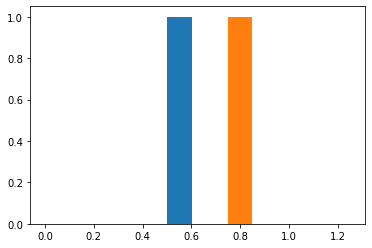

In [39]:
plt.hist(low_price_complete_rate)
plt.hist(high_price_complete_rate)

In [45]:
low_price_interval = file1[(file1.price > file1.price.min()) & (file1.price <= file1.price.median())]
high_price_interval = file1[(file1.price > file1.price.median()) & (file1.price <= file1.price.max())]

In [46]:
low = folium.map.FeatureGroup()
high = folium.map.FeatureGroup()

In [47]:
for lat, lng, in zip(low_price_interval.latitude, low_price_interval.longitude):
    low.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )
for lat, lng, in zip(high_price_interval.latitude, high_price_interval.longitude):
    high.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='green',
            fill_opacity=0.4
        )
    )

In [48]:
san_map = folium.Map()
san_map.add_child(low)
san_map.add_child(high)

In [49]:
low_complete = file1[(file1.status == 1) & (file1.price >= file1.price.min()) & (file1.price <= file1.price.median())]
low_imcomplete = file1[(file1.status == 0) & (file1.price >= file1.price.min()) & (file1.price <= file1.price.median())]
high_complete = file1[(file1.status == 1) & (file1.price > file1.price.median()) & (file1.price <= file1.price.max())]
high_imcomplete = file1[(file1.status == 0) & (file1.price > file1.price.median()) & (file1.price <= file1.price.max())]

In [54]:
print(low_complete.shape[0])
print(low_imcomplete.shape[0])
print(high_complete.shape[0])
print(high_imcomplete.shape[0])

210
209
312
104


In [50]:
low_complete_map = folium.map.FeatureGroup()
low_imcomplete_map = folium.map.FeatureGroup()
high_complete_map = folium.map.FeatureGroup()
high_imcomplete_map = folium.map.FeatureGroup()

In [51]:
for lat, lng, in zip(low_complete.latitude, low_complete.longitude):
    low_complete_map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            #fill_color='red',
            fill_opacity=0.4
        )
    )
for lat, lng, in zip(low_imcomplete.latitude, low_imcomplete.longitude):
    low_imcomplete_map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='red',
            fill=True,
            #fill_color='red',
            fill_opacity=0.4
        )
    )
for lat, lng, in zip(high_complete.latitude, high_complete.longitude):
    high_complete_map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            #fill_color='red',
            fill_opacity=0.4
        )
    )
for lat, lng, in zip(high_imcomplete.latitude, high_imcomplete.longitude):
    high_imcomplete_map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='green',
            fill=True,
            #fill_color='red',
            fill_opacity=0.4
        )
    )

In [53]:
sam_map = folium.Map()
sam_map.add_child(low_complete_map)
sam_map.add_child(low_imcomplete_map)
sam_map.add_child(high_complete_map)
sam_map.add_child(high_imcomplete_map)

In [127]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=6)
#help(clf.fit)

Help on method fit in module sklearn.cluster._kmeans:

fit(X, y=None, sample_weight=None) method of sklearn.cluster._kmeans.KMeans instance
    Compute k-means clustering.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape=(n_samples, n_features)
        Training instances to cluster. It must be noted that the data
        will be converted to C ordering, which will cause a memory
        copy if the given data is not C-contiguous.
    
    y : Ignored
        Not used, present here for API consistency by convention.
    
    sample_weight : array-like, shape (n_samples,), optional
        The weights for each observation in X. If None, all observations
        are assigned equal weight (default: None).
    
    Returns
    -------
    self
        Fitted estimator.



In [128]:
X = file1.latitude
Y = file1.longitude
Z = file1.price

In [129]:
def my_norm(x):
    x = (x-x.min()) / (x.max()-x.min())
    return x

In [130]:
X = my_norm(X)
Y = my_norm(Y)
Z = my_norm(Z)

In [131]:
X = X.values
Y = Y.values
Z = Z.values

In [132]:
X.shape

(835,)

In [133]:
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)
Z = Z.reshape(Z.shape[0], 1)

In [134]:
data = np.hstack((X, Y, Z))

In [135]:
data.shape

(835, 3)

In [136]:
clf.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [137]:
centers = clf.cluster_centers_
labels = clf.labels_
print(centers)
print(labels)

[[0.68058364 0.36965542 0.35      ]
 [0.40387874 0.41576529 0.92307692]
 [0.1081771  0.71661174 0.06178344]
 [0.28337882 0.67247604 0.31040268]
 [0.43241999 0.35813654 0.05167197]
 [0.34249747 0.25145652 0.36761905]]
[2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 3 2 3 2 2 2 2 2 2 3 2 3 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 0 4 4 5 4 4 4 0 4 4 5 0 4 4 4 4 0 0 0 0 4 4 4 4 4 4 4 2 3 4 4 4 4 4 4 4
 4 4 4 5 4 4 4 4 4 4 4 4 5 3 3 4 0 4 4 4 3 3 5 3 4 4 0 4 0 4 0 0 4 0 4 0 3
 0 0 0 0 0 4 0 4 0 0 0 0 0 0 4 0 4 0 4 0 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 5 4 5 5 4 5 4 5 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 0 0
 0 0 0 0 0 0 0 0 4 0 0 0 4 4 0 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4
 4 0 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 3 2 2 2 2 2 4 2 4 4 4 4 2 4
 4 4 4 3 2 4 4 4 4 4 4 4 4 3 3 4 

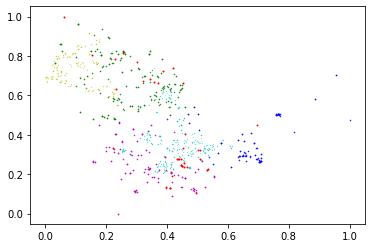

In [140]:
cols=['b','r','y','g','c','m']
for i in range(data.shape[0]):
    plt.scatter(data[i][0], data[i][1], data[i][2], cols[labels[i]])

In [122]:
temp = clf.predict(data[1].reshape(1, data[1].shape[0]))

In [125]:
temp[0]

1